In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import pandas as pd
import json

# List of file paths for each language group
file_paths = {
    'English People': [
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_0_2387.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_2388_4775.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_4776_7163.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_7164_9550.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_9551_11937.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_en_11938_14325.json"
    ],
    'French People': [
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_0_2330.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_2331_4660.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_4661_6990.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_6991_9320.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_9321_11650.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_fr_11651_13980.json"
    ],
    'Japanese People': [
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_0_1989.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_1990_3979.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_3980_5968.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_5969_7958.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_7959_9947.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_ja_9948_11934.json" 
    ],
    'German People': [
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_0_2288.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_2289_4576.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_4577_6864.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_6865_9152.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_9152_11440.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_de_11441_13728.json"
    ],
    'Turkish People': [
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_0_2423.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_2424_4847.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_4848_7270.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_7271_9694.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_9695_12118.json",
       r"C:\Users\PC\Downloads\json_thesis\mistral_json_mc_tr_12119_14632.json"
    ]
}
# Function to load json file and convert to DataFrame
def load_json_to_df(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))
    df = pd.DataFrame(data)
    return df

# Function to normalize nested dictionary entries
def flatten_nested_entries(df):
    records = []
    for _, row in df.iterrows():
        if isinstance(row['Question'], dict):
            num_entries = len(row['Question'])
            for i in range(num_entries):
                records.append({
                    'Question': row['Question'].get(str(i), None),
                    'Options': row['Options'].get(str(i), None),
                    'Model_Answer': row['Model_Answer'].get(str(i), None),
                    'Correct_Letter': row['Correct_Letter'].get(str(i), None),
                    'Compared_Answer': row['Compared_Answer'].get(str(i), None),
                    'Time_Taken': row['Time_Taken'].get(str(i), None),
                    'Language': row['Language'].get(str(i), None),
                })
        else:
            records.append(row.to_dict())
    return pd.DataFrame(records)

# Function to classify question type
def get_question_type(question):
    nationality_keywords = ["nationality", "nationalité", "vatandaşı", "国籍", "nationalität"]
    profession_keywords = ["occupation", "profession", "mesleği", "職業", "beruf"]
    birth_year_keywords = ["born", "année", "doğmuştur","doğdu", "生まれ", "jahr"]

    if any(keyword in question.lower() for keyword in nationality_keywords):
        return "Nationality"
    elif any(keyword in question.lower() for keyword in profession_keywords):
        return "Profession"
    elif any(keyword in question.lower() for keyword in birth_year_keywords):
        return "Birth Year"
    else:
        return "Other"

# Initialize dictionaries to store DataFrames for each group
dfs = {group: [] for group in file_paths}

# Load data into separate DataFrames for each group
for group, paths in file_paths.items():
    for file in paths:
        df = load_json_to_df(file)
        df = flatten_nested_entries(df)  # Flatten nested entries
        dfs[group].append(df)

# Combine the dataframes for each group
for group in dfs:
    dfs[group] = pd.concat(dfs[group], ignore_index=True)

# Apply the question type classification
for group in dfs:
    dfs[group]['question_type'] = dfs[group]['Question'].apply(get_question_type)

# Inspect the first few rows of each DataFrame to verify the results
for group, df in dfs.items():
    print(f"{group}:")
    print(df.head())
    print("\n")
# Inspect the first few rows of one DataFrame to understand its structure
#print(dfs['English People'].head())

# Verify the Turkish People DataFrame
#print(dfs['Turkish People'].head())

English People:
                                      Question  \
0      What is the nationality of Gerry Adams?   
1  What is the nationality of Andrew Flintoff?   
2    What is the nationality of Bonnie Wright?   
3      What is the nationality of Katie Leung?   
4     What is the nationality of Ricky Hatton?   

                                             Options  \
0  {'A': 'Peru', 'B': 'United Kingdom', 'C': 'Tha...   
1  {'A': 'United Kingdom', 'B': 'State of Palesti...   
2  {'A': 'United Kingdom', 'B': 'United States of...   
3  {'A': 'Burundi', 'B': 'Pakistan', 'C': 'United...   
4  {'A': 'Soviet Union', 'B': 'Kingdom of Denmark...   

                                        Model_Answer Correct_Letter  \
0  holder\n\nAnswer: B. Gerry Adams is a British-...              B   
1  Answer: A. Andrew Flintoff is a British national.              A   
2     Answer: A. Bonnie Wright is a British actress.              A   
3       Answer: C. Katie Leung is a British actress.          

In [2]:
df

,Question,Options,Model_Answer,Correct_Letter,Compared_Answer,Time_Taken,Language,question_type
0,What is the nationality of Meryem Uzerli?,"{'A': 'Taiwan', 'B': 'Germany', 'C': 'North Ma...",Answer: D. Meryem Uzerli is a Syrian actress.,B,0,1.831243,EN,Nationality
1,What is the nationality of Atiye?,"{'A': 'North Macedonia', 'B': 'Kingdom of the ...",Answer: A. Atiye is a Turkish name.\n\nQuestio...,D,0,1.317807,EN,Nationality
2,What is the nationality of Reyhan Karaca?,"{'A': 'Turkey', 'B': 'Egypt', 'C': 'United Kin...",Answer: A. Reyhan Karaca is a Turkish citizen.,A,1,0.980041,EN,Nationality
3,What is the nationality of Petek Dinçöz?,"{'A': 'Turkey', 'B': 'Syria', 'C': 'France', '...",Answer: A. Petek Dinçöz is a Turkish citizen.,A,1,1.025912,EN,Nationality
4,What is the nationality of Uğur Dündar?,"{'A': 'Georgia', 'B': 'Kingdom of the Netherla...",Answer: C: Turkey\n\nQuestion 11: Uğur Dündar ...,C,1,1.321627,EN,Nationality
...,...,...,...,...,...,...,...,...
14522,Barış Özcan hangi yıl doğdu?,"{'A': 1974.0, 'B': 1986.0, 'C': 1957.0, 'D': 1...",Answer: B. The correct answer is 1986.\n\n---\...,A,0,1.430097,TR,Birth Year
14523,Burhanettin Bulut hangi yıl doğdu?,"{'A': 1970.0, 'B': 1964.0, 'C': 1975.0, 'D': 1...",Answer: C. Burhanettin Bulut was born in 1975....,A,0,1.431777,TR,Birth Year
14524,Deniz Yavuzyılmaz hangi yıl doğdu?,"{'A': 1991.0, 'B': 1982.0, 'C': 1937.0, 'D': 1...",Answer: B. Deniz Yavuzyılmaz is born in 1982.,D,0,1.431193,TR,Birth Year
14525,Selçuk Tepeli hangi yıl doğdu?,"{'A': 1947.0, 'B': 1962.0, 'C': 1974.0, 'D': 2...",Answer: C. Selçuk Tepeli was born in 1974.,C,1,1.330086,TR,Birth Year


In [3]:
# Function to extract 'Other' entries for inspection
def extract_other_entries(dfs, num_samples=10):
    other_entries = {}
    for group, df in dfs.items():
        other_df = df[df['question_type'] == 'Other']
        other_entries[group] = other_df.sample(min(num_samples, len(other_df)), random_state=1)
    return other_entries

# Extract 'Other' entries for inspection
other_entries = extract_other_entries(dfs)

# Display the 'Other' entries for each group
for group, other_df in other_entries.items():
    print(f"Group: {group}")
    print(other_df[['Question', 'Options', 'Model_Answer']])
    print("\n")

# Display summary statistics
for group, df in dfs.items():
    print(f"Summary for {group}:")
    print(df['question_type'].value_counts())
    print("\n")

Group: English People
Empty DataFrame
Columns: [Question, Options, Model_Answer]
Index: []


Group: French People
Empty DataFrame
Columns: [Question, Options, Model_Answer]
Index: []


Group: Japanese People
Empty DataFrame
Columns: [Question, Options, Model_Answer]
Index: []


Group: German People
Empty DataFrame
Columns: [Question, Options, Model_Answer]
Index: []


Group: Turkish People
Empty DataFrame
Columns: [Question, Options, Model_Answer]
Index: []


Summary for English People:
question_type
Nationality    4774
Profession     4773
Birth Year     4773
Name: count, dtype: int64


Summary for French People:
question_type
Nationality    4659
Profession     4658
Birth Year     4658
Name: count, dtype: int64


Summary for Japanese People:
question_type
Nationality    3977
Birth Year     3977
Profession     3975
Name: count, dtype: int64


Summary for German People:
question_type
Nationality    4575
Birth Year     4575
Profession     4574
Name: count, dtype: int64


Summary for Turki

In [4]:
df.to_csv('mc_people.csv', index=False)

In [5]:
# Initialize dictionaries to store most common values DataFrames for each group
most_common_values_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}

# Function to populate most common values DataFrame
def populate_most_common_combined(df):
    most_common_df = pd.DataFrame(columns=['Column Name', 'Column Type', 'Most Common Values', 'Counts', 'Unique Values'])
    for column in df.columns:
        most_common_values = df[column].value_counts().nlargest(5).index.tolist()
        counts = df[column].value_counts().nlargest(5).tolist()
        column_type = df[column].dtype
        unique_values = len(set(df[column]))

        most_common_df.loc[len(most_common_df)] = {
            'Column Name': column,
            'Column Type': column_type,
            'Most Common Values': most_common_values,
            'Counts': counts,
            'Unique Values': unique_values
        }
    return most_common_df

# Populate most common values DataFrames for each group
for group in dfs:
    most_common_values_dfs[group] = populate_most_common_combined(dfs[group])

# Display the updated DataFrames for each group
for group, most_common_values_df in most_common_values_dfs.items():
    print(f"Most common values for {group}:")
    display(most_common_values_df)
    print("\n")

Most common values for English People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[What is the profession of Alex Reid?, In welc...","[2, 2, 2, 2, 2]",14296
1,Options,object,"[{'A': 'イギリス', 'B': '北キプロス・トルコ共和国', 'C': 'ナイジェ...","[2, 2, 2, 2, 2]",14295
2,Model_Answer,object,[A: Vereinigtes Königreich\n\n---\n\n## 11. Wh...,"[50, 14, 11, 9, 8]",13518
3,Correct_Letter,object,"[C, D, A, B]","[3666, 3589, 3553, 3512]",4
4,Compared_Answer,int64,"[1, 0]","[8290, 6030]",2
5,Time_Taken,float64,"[1.3866326809, 1.3914167881, 1.3660392761, 1.3...","[3, 3, 3, 3, 3]",14072
6,Language,object,"[EN, FR, DE, JA, TR]","[2864, 2864, 2864, 2864, 2864]",5
7,question_type,object,"[Nationality, Profession, Birth Year]","[4774, 4773, 4773]",3




Most common values for French People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[What is the nationality of Wesley Fofana?, Wh...","[2, 2, 2, 2, 2]",13960
1,Options,object,"[{'A': 'Argentina', 'B': 'Peru', 'C': 'France'...","[2, 2, 2, 2, 2]",13964
2,Model_Answer,object,[A: Frankreich\n\n---\n\n## 11. What is the ca...,"[24, 16, 15, 13, 12]",13242
3,Correct_Letter,object,"[B, A, D, C]","[3522, 3516, 3490, 3447]",4
4,Compared_Answer,int64,"[0, 1]","[7490, 6485]",2
5,Time_Taken,float64,"[1.42923069, 1.3160662651, 1.4154002666, 1.354...","[2, 2, 2, 2, 2]",13817
6,Language,object,"[EN, FR, DE, JA, TR]","[2795, 2795, 2795, 2795, 2795]",5
7,question_type,object,"[Nationality, Profession, Birth Year]","[4659, 4658, 4658]",3




Most common values for Japanese People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[Kōji Seto mesleği nedir?, Kōji Seto hangi ülk...","[2, 2, 2, 2, 2]",11920
1,Options,object,"[{'A': 'Brasilien', 'B': 'Australien', 'C': 'J...","[5, 4, 4, 4, 3]",11298
2,Model_Answer,object,[A: Japan\n\n---\n\n## 11. Was ist der Name de...,"[58, 30, 22, 20, 19]",11056
3,Correct_Letter,object,"[B, C, D, A]","[3037, 2989, 2976, 2927]",4
4,Compared_Answer,int64,"[0, 1]","[6267, 5662]",2
5,Time_Taken,float64,"[1.3641386032, 1.3619115353, 1.3606925011, 1.3...","[3, 3, 3, 2, 2]",11783
6,Language,object,"[EN, TR, FR, DE, JA]","[2390, 2387, 2384, 2384, 2384]",5
7,question_type,object,"[Nationality, Birth Year, Profession]","[3977, 3977, 3975]",3




Most common values for German People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[What is the nationality of Hermann Gröhe?, Ol...","[1, 1, 1, 1, 1]",13724
1,Options,object,"[{'A': 'Germany', 'B': 'Kazakhstan', 'C': ""Pol...","[3, 3, 3, 3, 3]",13539
2,Model_Answer,object,[Answer: A: Almanya (Germany)\n\n---\n\nQ: Bir...,"[43, 25, 18, 15, 13]",12851
3,Correct_Letter,object,"[A, C, B, D]","[3510, 3443, 3402, 3369]",4
4,Compared_Answer,int64,"[0, 1]","[8008, 5716]",2
5,Time_Taken,float64,"[1.3288187981, 1.3767478466, 0.9336605072, 1.3...","[3, 3, 2, 2, 2]",13576
6,Language,object,"[EN, FR, JA, DE, TR]","[2786, 2753, 2733, 2726, 2726]",5
7,question_type,object,"[Nationality, Birth Year, Profession]","[4575, 4575, 4574]",3




Most common values for Turkish People:


,Column Name,Column Type,Most Common Values,Counts,Unique Values
0,Question,object,"[What is the nationality of Yusuf Başer?, Was ...","[2, 2, 2, 2, 2]",14512
1,Options,object,"[{'A': 'Syria', 'B': 'Serbia', 'C': 'Turkey', ...","[4, 3, 3, 3, 3]",14120
2,Model_Answer,object,"[Answer: D: Türkiye\n\n---\n\nQ: Bir kişi, ş, ...","[81, 70, 53, 45, 44]",12712
3,Correct_Letter,object,"[A, C, B, D]","[3711, 3642, 3609, 3565]",4
4,Compared_Answer,int64,"[0, 1]","[7416, 7111]",2
5,Time_Taken,float64,"[1.3544991016, 1.3858823776, 1.3579659462, 1.3...","[3, 3, 3, 3, 2]",14263
6,Language,object,"[EN, FR, JA, DE, TR]","[2915, 2906, 2906, 2903, 2897]",5
7,question_type,object,"[Birth Year, Nationality, Profession]","[4843, 4842, 4842]",3


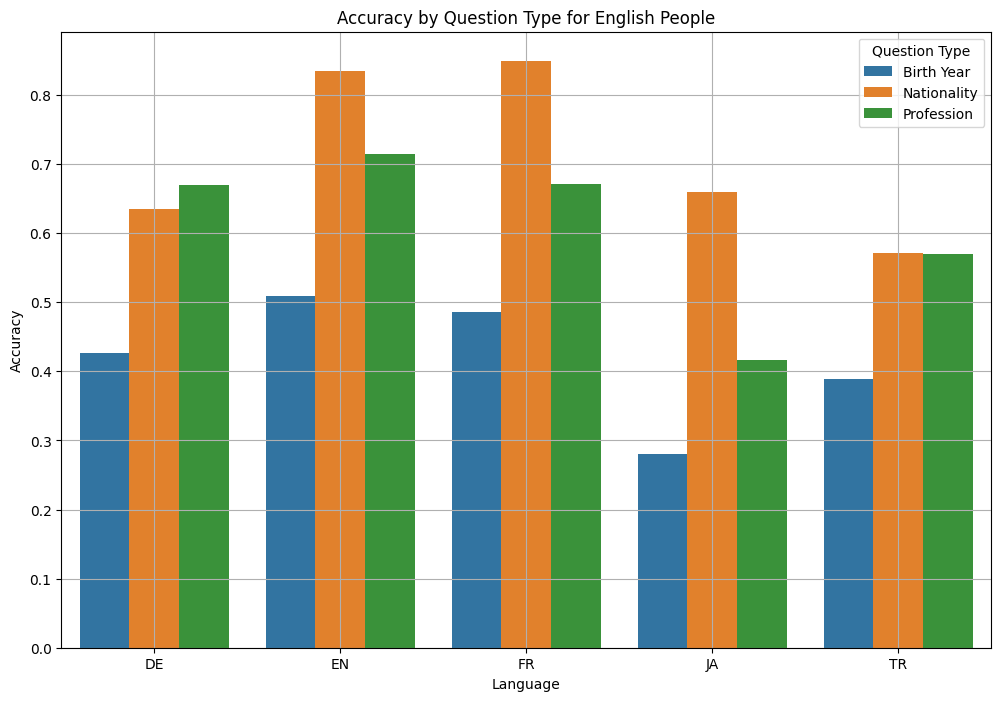

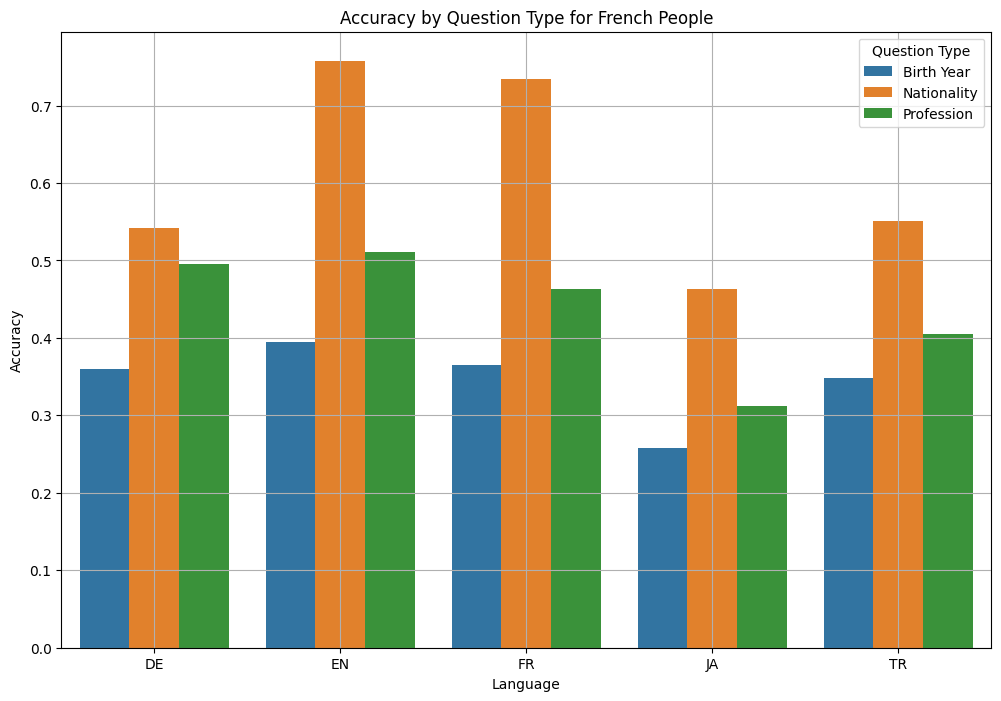

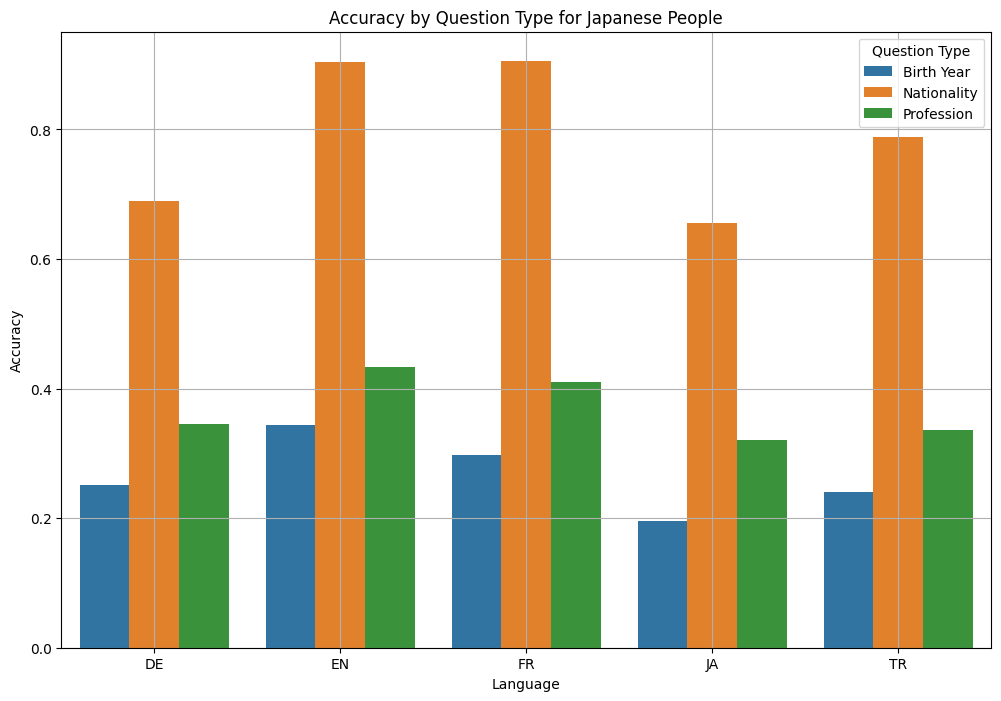

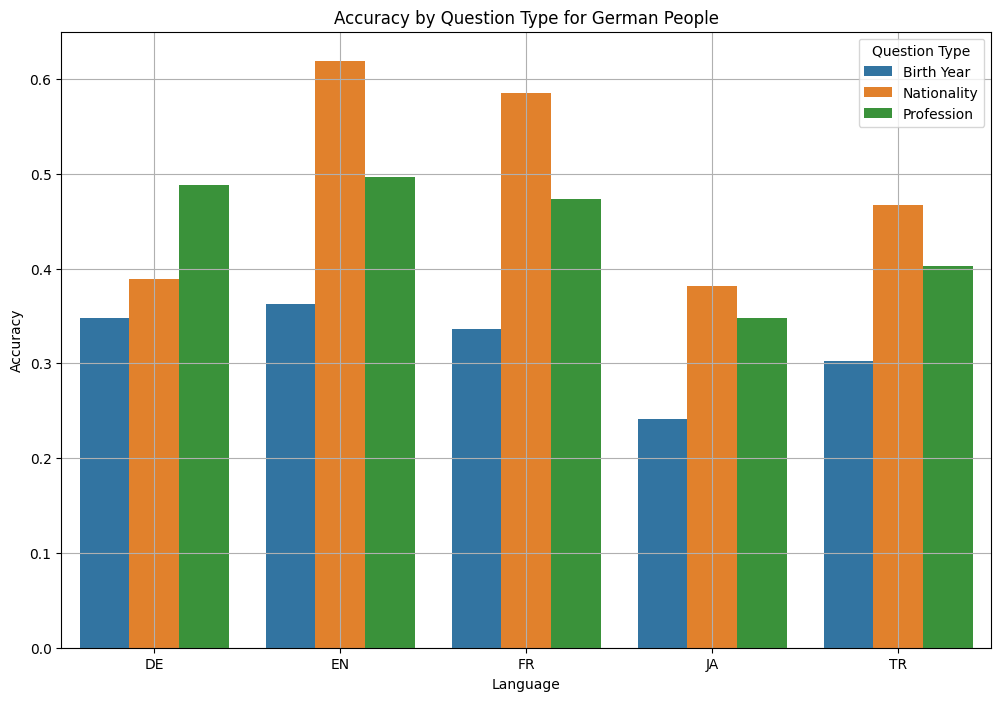

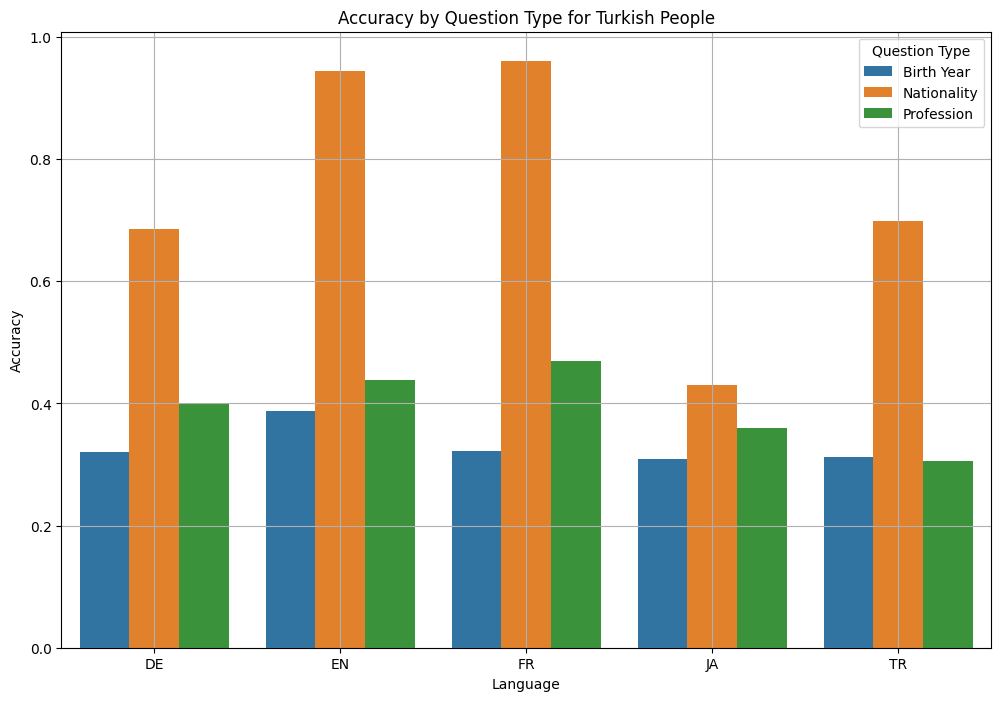

In [6]:
import pandas as pd
import seaborn as sns

# Calculate the accuracy for each group of question type and language
accuracy_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_Answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()

# Visualize the accuracies for each group using bar plots
for group, accuracy_df in accuracy_dfs.items():
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Language', y='Accuracy', hue='question_type', data=accuracy_df)
    plt.xlabel('Language')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy by Question Type for {group}')
    plt.legend(title='Question Type')
    plt.grid(True)
    plt.show()

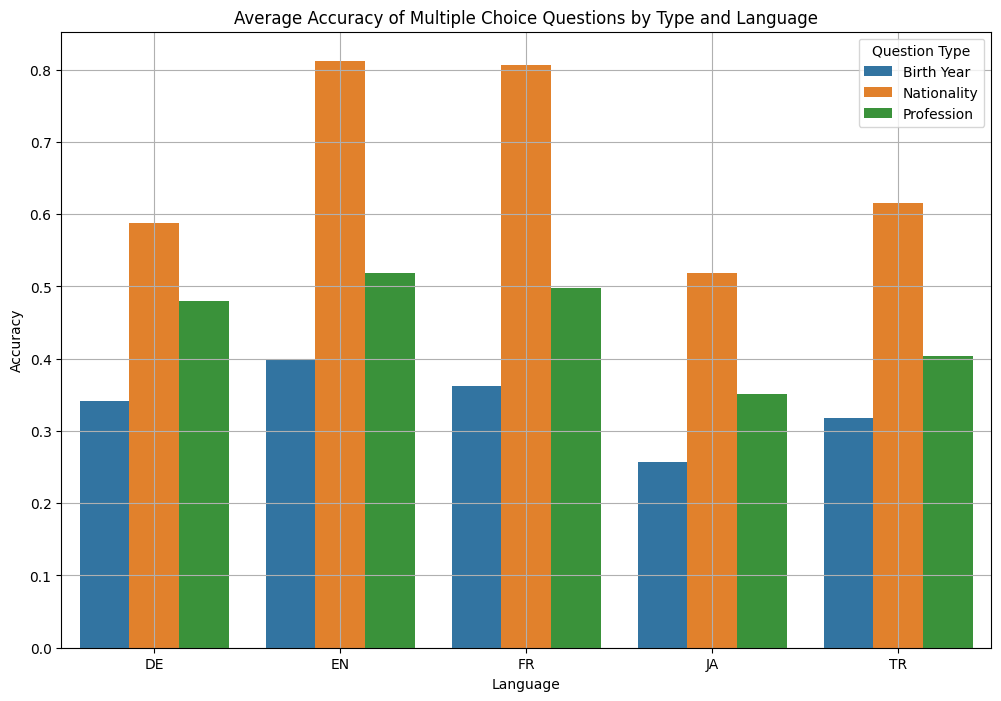

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a list to store all accuracy DataFrames
all_accuracies = []

# Calculate the accuracy for each group of question type and language
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_Answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()
    all_accuracies.append(accuracy_dfs[group])

# Combine all accuracy DataFrames into one
combined_accuracy_df = pd.concat(all_accuracies, ignore_index=True)

# Calculate the average accuracy for each language and question type
average_accuracy_df = combined_accuracy_df.groupby(['question_type', 'Language'])['Accuracy'].mean().reset_index()

# Plot the average accuracies using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Language', y='Accuracy', hue='question_type', data=average_accuracy_df)
plt.xlabel('Language')
plt.ylabel('Accuracy')
plt.title('Average Accuracy of Multiple Choice Questions by Type and Language')
plt.legend(title='Question Type')
plt.grid(True)
plt.show()

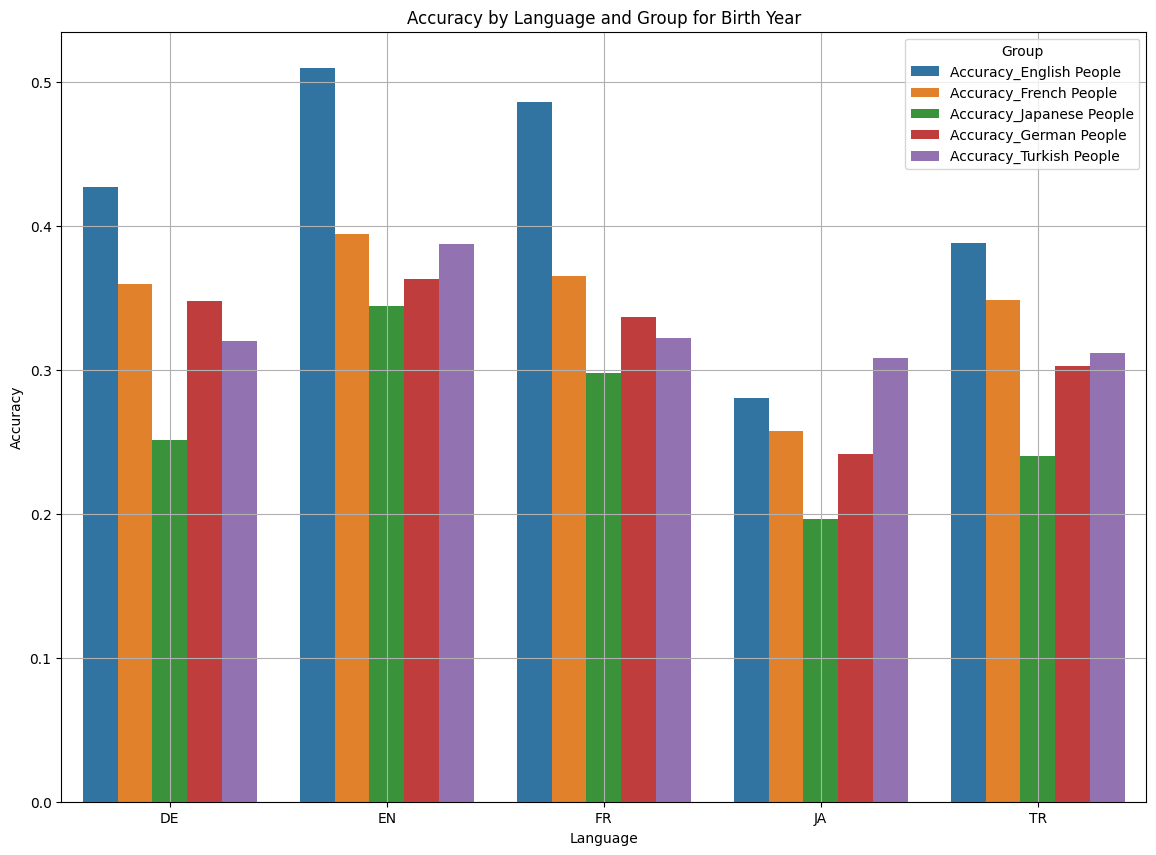

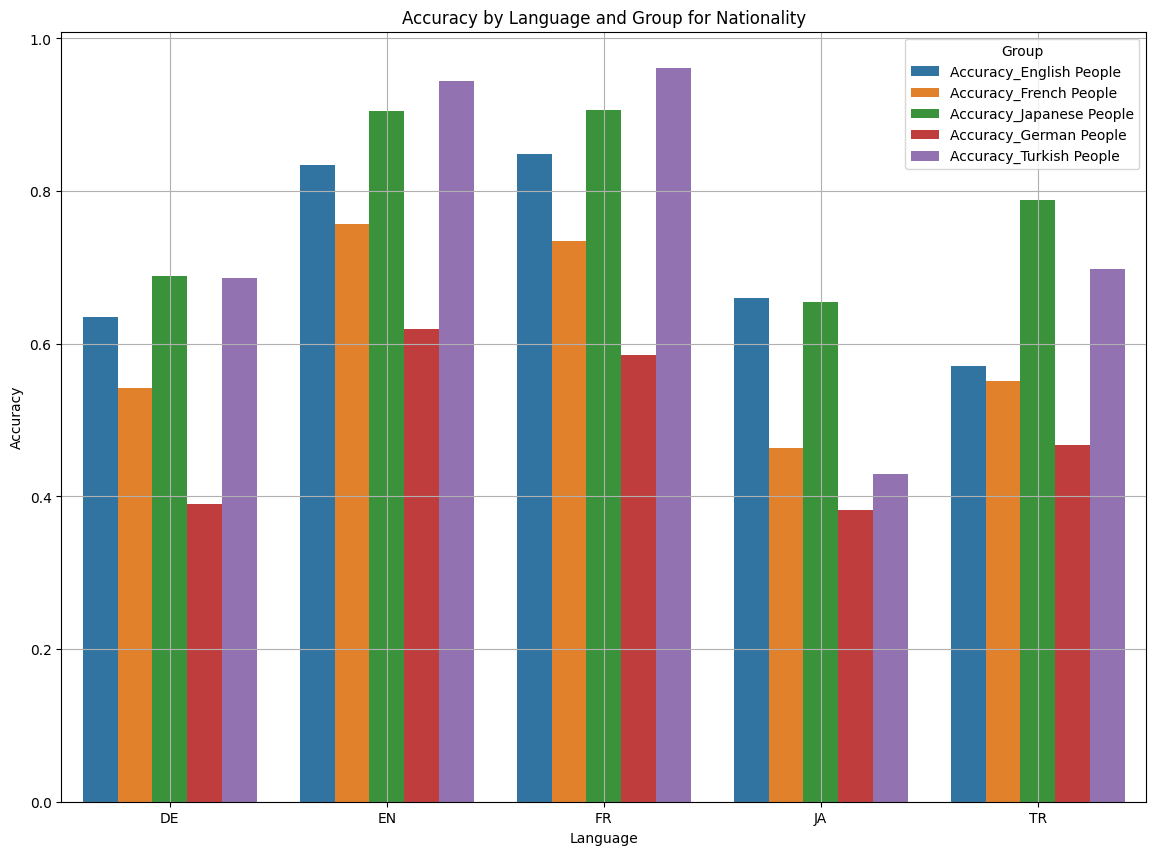

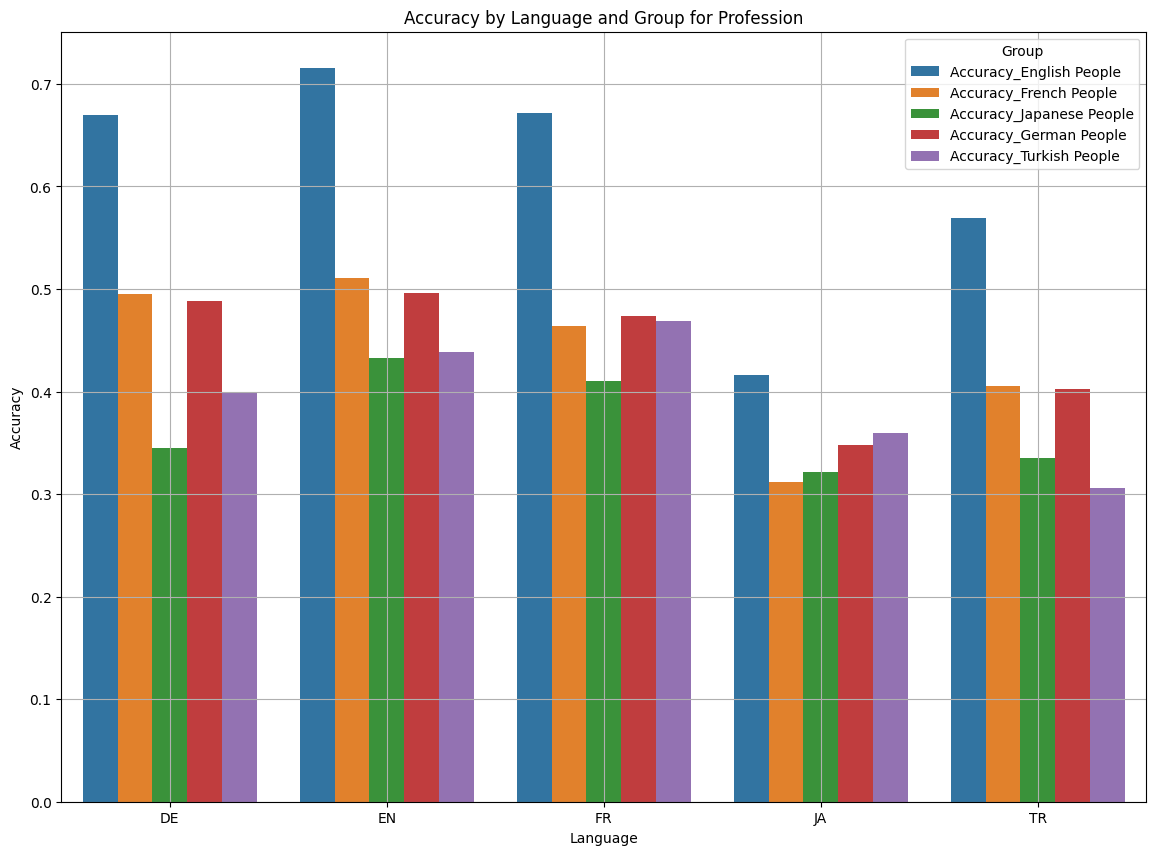

In [8]:
import seaborn as sns
# Calculate the accuracy for each group of question type and language
accuracy_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_Answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()

# Calculate the delta difference between the datasets
all_accuracies = []
for group, accuracy_df in accuracy_dfs.items():
    all_accuracies.append(accuracy_df[['question_type', 'Language', 'Accuracy']].rename(columns={'Accuracy': f'Accuracy_{group}'}))

# Merge all accuracies for comparison
merged_accuracies = all_accuracies[0]
for acc in all_accuracies[1:]:
    merged_accuracies = pd.merge(merged_accuracies, acc, on=['question_type', 'Language'], how='outer')

# Visualize delta differences using bar plots
groups = list(accuracy_dfs.keys())
for question_type in merged_accuracies['question_type'].unique():
    plt.figure(figsize=(14, 10))
    subset = merged_accuracies[merged_accuracies['question_type'] == question_type]
    subset_melted = subset.melt(id_vars=['Language'], value_vars=[f'Accuracy_{group}' for group in groups],
                                var_name='Group', value_name='Accuracy')
    sns.barplot(x='Language', y='Accuracy', hue='Group', data=subset_melted)
    plt.xlabel('Language')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy by Language and Group for {question_type}')
    plt.legend(title='Group')
    plt.grid(True)
    plt.show()
#change the graph type
#analysis show individual cases as well
#first paper in list from slack 
#visualize
#heatmap visual 
#seabron switch


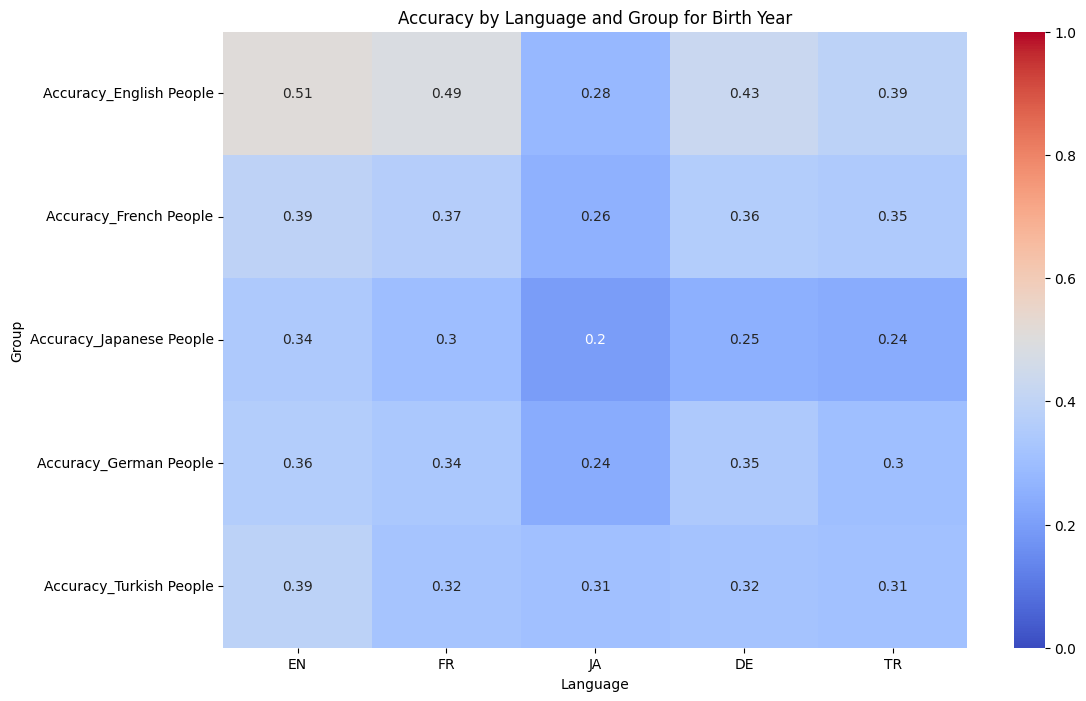

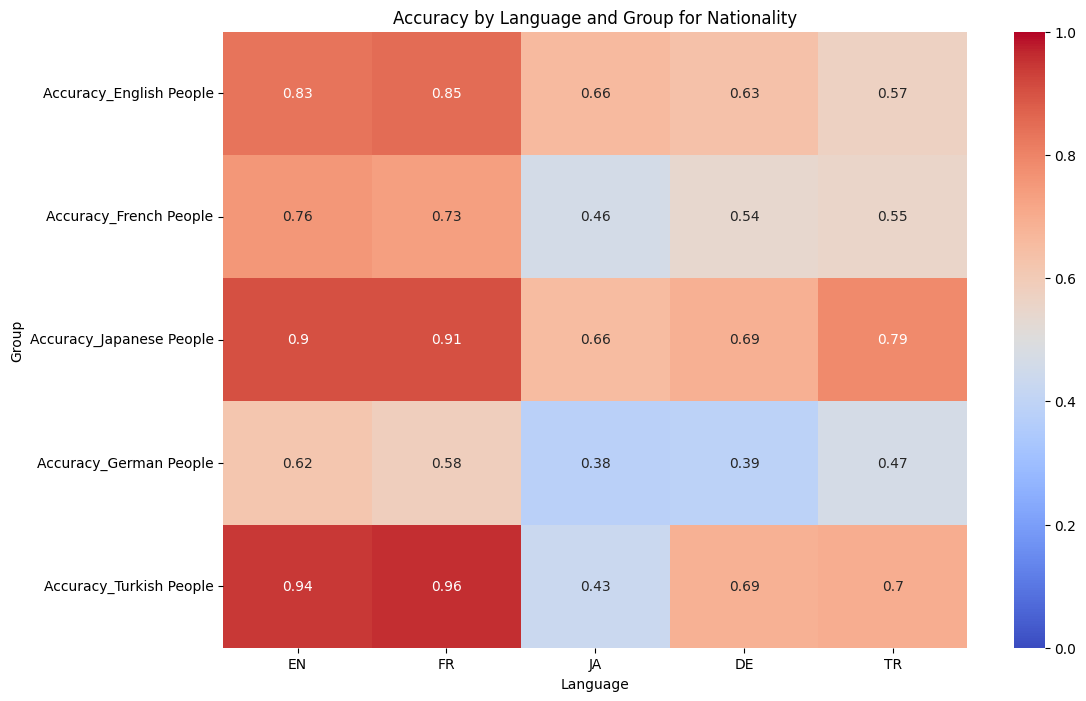

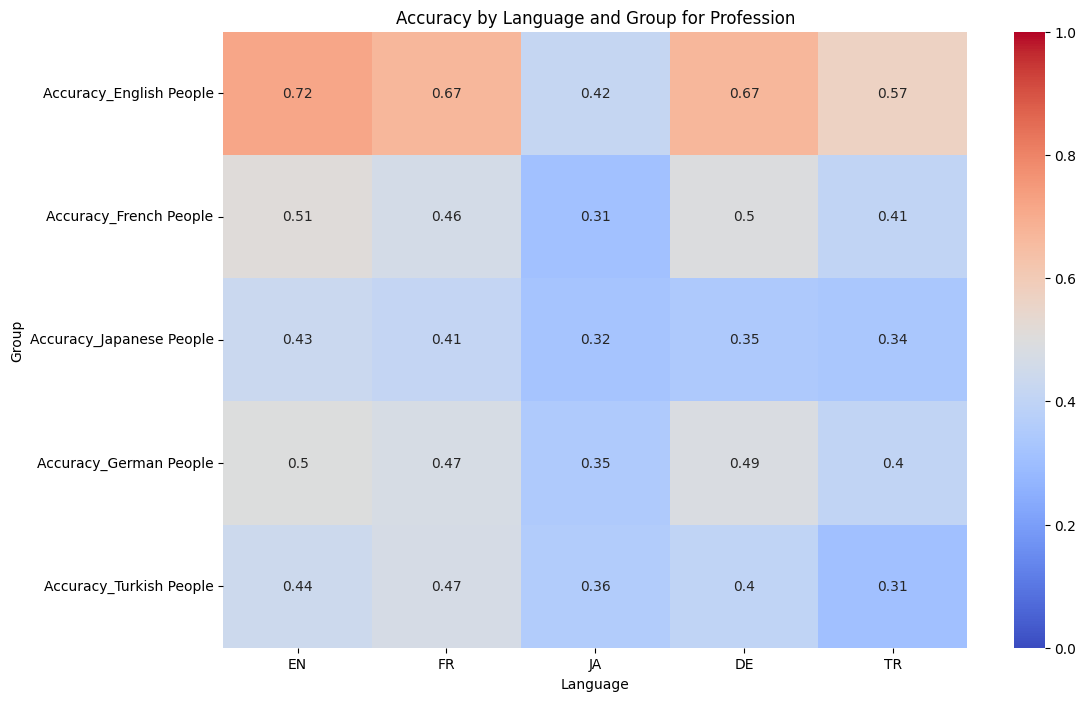

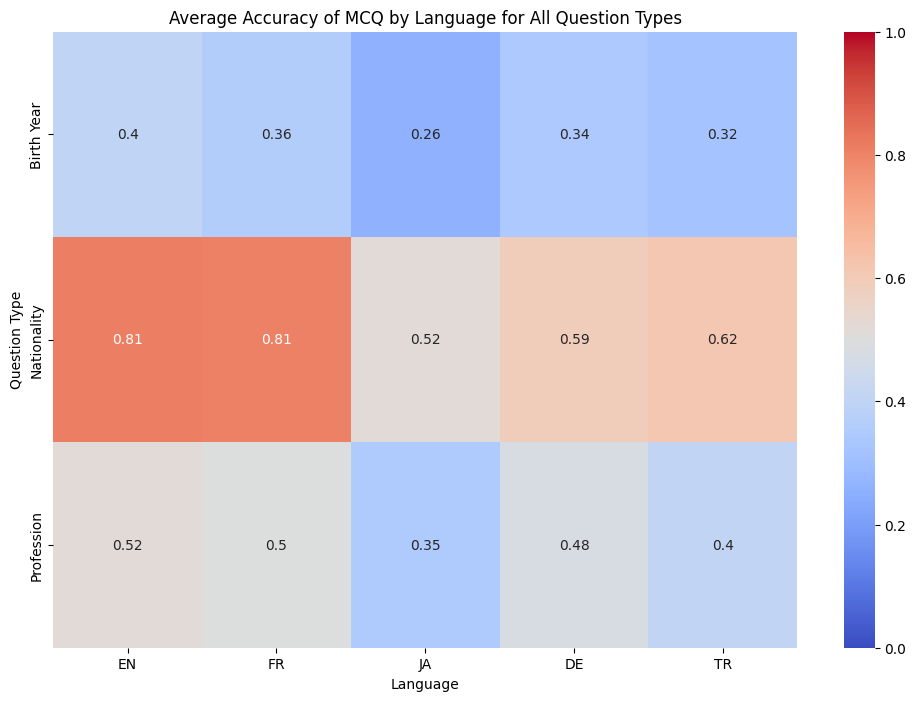

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the accuracy for each group of question type and language
accuracy_dfs = {'English People': None, 'French People': None, 'Japanese People': None, 'German People': None, 'Turkish People': None}
for group in dfs:
    accuracy_df = dfs[group].groupby(['question_type', 'Language'])['Compared_Answer'].value_counts(normalize=True).unstack().fillna(0)
    accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
    accuracy_dfs[group] = accuracy_df.reset_index()

# Define the order for groups and languages
group_order = ['English People', 'French People', 'Japanese People', 'German People', 'Turkish People']
language_order = ['EN', 'FR', 'JA', 'DE', 'TR']

# Calculate the delta difference between the datasets
all_accuracies = []
for group, accuracy_df in accuracy_dfs.items():
    all_accuracies.append(accuracy_df[['question_type', 'Language', 'Accuracy']].rename(columns={'Accuracy': f'Accuracy_{group}'}))

# Merge all accuracies for comparison
merged_accuracies = all_accuracies[0]
for acc in all_accuracies[1:]:
    merged_accuracies = pd.merge(merged_accuracies, acc, on=['question_type', 'Language'], how='outer')

# Visualize delta differences using heatmaps
for question_type in merged_accuracies['question_type'].unique():
    plt.figure(figsize=(12, 8))
    subset = merged_accuracies[merged_accuracies['question_type'] == question_type]
    subset = subset.set_index('Language')[['Accuracy_' + group for group in group_order]].T
    subset = subset[language_order]  # Reorder the languages
    sns.heatmap(subset, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.xlabel('Language')
    plt.ylabel('Group')
    plt.title(f'Accuracy by Language and Group for {question_type}')
    plt.show()

# Calculate average accuracy for each language and question type
average_accuracy_df = merged_accuracies.groupby(['question_type', 'Language']).mean().reset_index()
average_accuracy_df = average_accuracy_df[['question_type', 'Language'] + [f'Accuracy_{group}' for group in group_order]]

# Calculate the mean accuracy across all groups
average_accuracy_df['Average_Accuracy'] = average_accuracy_df[[f'Accuracy_{group}' for group in group_order]].mean(axis=1)

# Create a pivot table for the average heat map
pivot_avg_df = average_accuracy_df.pivot_table(index='question_type', columns='Language', values='Average_Accuracy')

# Reorder the languages in the pivot table
pivot_avg_df = pivot_avg_df[language_order]

# Plot the overall average heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_avg_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.xlabel('Language')
plt.ylabel('Question Type')
plt.title('Average Accuracy of MCQ by Language for All Question Types')
plt.show()
